# Сборный проект-1

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
# df = pd.read_csv('yandex_games_project_data.csv')
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Однозначно нужно переименовать колонки, а именно привести их названия к нижнему регистру. 

Пропуски имеются большинстве колонок:
* `name`
* `year_of_release`
* `genre`
* `critic_score`
* `user_score`
* `rating`

Пропусков в первых трех колонках совсем не много и они имеет важное значение: название, год выпуска и жанр игры нам исключительно важно знать для анализа. Эти пропуски мы удалим и таким образом пожертвуем чуть менее, чем 300 строк. Что же касается пропусков в трех других колонках - мы либо с ними поработаем, либо оставим, как есть. 

Что же касается типов данных, `year_of_release` нужно привести целочисленному формату, а `user_score` к  формату _float_. Остальные данные останутся прежних типов. 

# Предобработка данных

## Приведение колонок к нижнему регистру

In [5]:
df.columns=df.columns.str.lower()

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Поиск дубликатов

До того, как мы удалим дубликаты и пропущенные значения, мы сохраним оригинальное количество строк в переменную _entries_before_. Это понадобится для того, чтобы оценить, каком количество строк нам пришлось пожертвовать на этапе предобработки. 

In [7]:
entries_before=len(df)

In [8]:
df.duplicated().sum()

0

Полных дубликатов, появившихся как следствие технической ошибки, нет, но стоит изучить колонки типа _object_, а также `year_of_release` на предмет дубликатов из-за человеческого фактора (по-разному записали одно и то же). 

In [9]:
df['name'].value_counts()

Need for Speed: Most Wanted                       12
Madden NFL 07                                      9
LEGO Marvel Super Heroes                           9
Ratatouille                                        9
FIFA 14                                            9
                                                  ..
Record of Agarest War: Marriage                    1
Marvel Superheroes 3D: Grandmaster's Challenge     1
D.Gray-man: Kami no Shitotachi                     1
WWF SmackDown!                                     1
Yes! PreCure 5                                     1
Name: name, Length: 11559, dtype: int64

In [10]:
len(df['name'].unique())

11560

In [11]:
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


В колонке `name`, вероятно, дубликатов мы не найдем: там указаны названия игр  и эти названия встречаются несколько раз, если игра представлена на нескольких платформах. 

In [12]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [13]:
sorted(df['year_of_release'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

In [14]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [15]:
sorted(df['critic_score'].unique())

[76.0,
 nan,
 13.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0]

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Дубликаты не обнаружены!

В колонке `user_score` попадается значение 'tbd'. 'Tbd' означает 'to be decided', то есть 'подлежит уточнению'. Эти значения стоит заменить на NaN для того, чтобы эту колонку можно было перевести в тип данных _float_.

In [18]:
df['user_score'].replace('tbd', np.NaN, inplace = True)

## Обработка пропусков

### Удаление строк с пропусками в `name`, `year_of_release`, `genre`

In [19]:
df = df.dropna(subset=['name'])
df = df.dropna(subset=['year_of_release'])
df = df.dropna(subset=['genre'])

### Работа с пропусками в `critic_score`, `user_score`, `rating`

In [20]:
print(
'Количество пропусков в колонке "critic_score":', len(df[df['critic_score'].isna()==True])
)

print(
'Количество пропусков в колонке "user_score":', len(df[df['user_score'].isna()==True])
)

print(
'Количество пропусков в колонке "rating":', len(df[df['rating'].isna()==True])
)

print(
'Количество строк, в которых значения пропущены одновременно и в "critic_score", и в "user_score":', 
    len(df[(df['critic_score'].isna()==True)&(df['user_score'].isna()==True)])
)

print(
'Количество строк, в которых значения пропущены одновременно в трех колонках - "critic_score", "user_score", "rating":', 
len(df[(df['critic_score'].isna()==True)
&(df['user_score'].isna()==True)
&(df['rating'].isna()==True)])
)

print (
'Доля строк с пропусками в трех колонках одновременно составляет {:.1%} от всей базы данных.'
.format(len(df[(df['critic_score'].isna()==True)
&(df['user_score'].isna()==True)
&(df['rating'].isna()==True)]) / len(df))
)

Количество пропусков в колонке "critic_score": 8461
Количество пропусков в колонке "user_score": 8981
Количество пропусков в колонке "rating": 6676
Количество строк, в которых значения пропущены одновременно и в "critic_score", и в "user_score": 7892
Количество строк, в которых значения пропущены одновременно в трех колонках - "critic_score", "user_score", "rating": 6580
Доля строк с пропусками в трех колонках одновременно составляет 40.0% от всей базы данных.


In [21]:
no_score = df[(df['critic_score'].isna()==True)
&(df['user_score'].isna()==True)
&(df['rating'].isna()==True)]

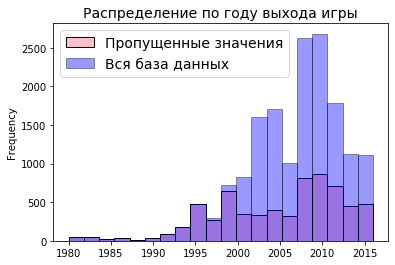

In [22]:
no_score['year_of_release'].plot(kind='hist', ec='black', color='pink', bins=20)
df['year_of_release'].plot(kind='hist', ec='black', alpha=0.4, color='blue', bins=20)
plt.rcParams['figure.figsize'] = [12, 7]
plt.title('Распределение по году выхода игры', fontsize=14)
plt.legend(['Пропущенные значения','Вся база данных'], fontsize=14)
plt.show()

Если сравнивать таблицу, в которую входят исключительство те строки, в которых одновременно пропущены значения в трех колонках `critic_score`, `user_score` и `rating`, со всей базой данных, то можно заметить следующее:
* до 1995 года пропуски в этих колонках идут по всей базе данных - консолидированной системы рейтинга и отзывов либо не существовало, либо эти данные не попали в нашу базу
* начиная с 2000 года большая половина игр уже имеет отзывы и рейтинг
* пропущенные значения распределяются пропорционально данным по всей базе начиная с ранних 2000-х

На данном этапе мы оставим эти пропуски, так как в остальных колонках этих строк данные присуствуют. Если мы удалим их все, мы потеряем большую часть данных, что не может не сказаться на результатах. 

In [23]:
entries_after=len(df)

### Изменение типов данных

In [24]:
df['year_of_release']=pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release']=df['year_of_release'].dt.year
df['user_score']=df['user_score'].astype('float')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Добавление столбца с суммарными продажами по всем регионам

In [26]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [27]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Промежуточный вывод

На этом этапе мы подготовили базу данных к работе:
* названия колонок приведены к нижнему регистру
* строки с пропусками в `name`, `year_of_release` и `genre` удалены
* значение 'tbd' в `user_score` перезаписано как _NaN_
* пропуски в `user_score`, `critics_score` и `rating` мы оставили, как есть так как их удаление значительно повлияет на данные
* изменили типы данных: `year_of_release` в целочисленный формат, `user_score` - на _float_

Теперь можно переходить к исследовательскому анализу данных. 

# Исследовательский анализ данных

## Продажи игр по годам

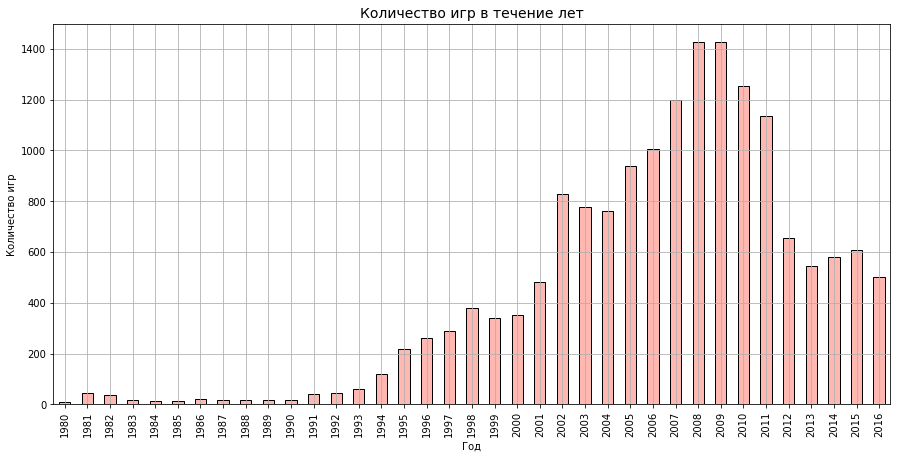

In [28]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', ec='black', figsize=(15,7), grid = True, color='#FFB7B2')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество игр в течение лет', fontsize=14)
plt.show()

In [29]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

По графику и таблице вы видим, как развивалась гейминг-индустрия в течение 36 лет: к 100+ играм, выпущенным в течение года, мы добрались к 1994 году, к 2002 это число перевалило за 500, а уже через 4 года - за 1000. Начиная с 2009 года количество, тем не менее, уменьшается.

## Продажи игр по платформам

Рассмотрим топ-10 платформ, которые получили наибольшую прибыль за весь период: изучим их прибыль и количество выпущенных игр. 

In [30]:
df.pivot_table(
    index='platform', values='total_sales', 
    aggfunc=('sum', 'count')
    ).sort_values(by='sum', ascending=False).head(10)

,count,sum
platform,,
PS2,2127,1233.56
X360,1232,961.24
PS3,1306,931.34
Wii,1286,891.18
DS,2121,802.78
PS,1190,727.58
PS4,392,314.14
GBA,811,312.88
PSP,1193,289.53


In [31]:
df.query('year_of_release == 2015 or year_of_release == 2016')['platform'].value_counts()

PS4     301
PSV     195
XOne    167
3DS     132
PS3     111
PC      104
X360     48
WiiU     42
Wii       5
PSP       3
Name: platform, dtype: int64

Несмотря на безусловных лидеров всех времен - PlayStation 2 и 3, а также Xbox 360, в анализ необходимо добавить  лидеров последних лет: PlayStation 4, PlayStation Vitа и Xbox One. 

Так для дальнейшего анализа пригодятся следующие платформы:
* PlayStation 2
* Xbox 360
* PlayStation 3
* Nintendo Wii
* Nintendo DS
* PlayStation 4
* PlayStation Vitа
* Xbox One

In [32]:
platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'PSV', 'XOne']
platforms_top5 = df.query('platform == @platforms_list')

In [33]:
platforms_top5.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,DS,PS2,PS3,PS4,PSV,Wii,X360,XOne
year_of_release,,,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,NaN,NaN,8.25,NaN
2006,119.81,103.42,20.96,NaN,NaN,137.15,51.62,NaN
2007,146.94,75.99,73.19,NaN,NaN,152.77,95.41,NaN


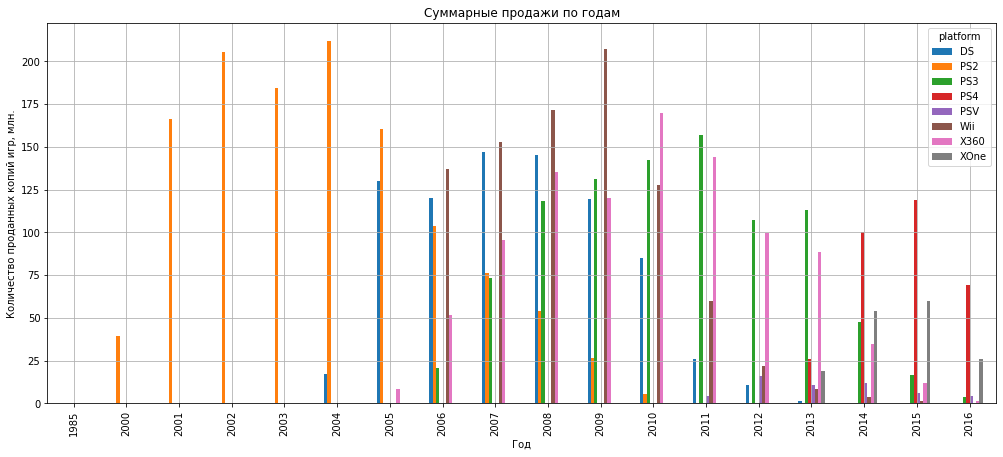

In [34]:
platforms_top5.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    kind='bar', figsize=(17,7))
plt.title('Суммарные продажи по годам')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

График демонстрирует динамику "власти" игровых платформ в течение лет: с 2000 по 2004 PlayStation 2 была безусловным лидером, однако в 2005 году Nintendo DS и Nintendo Wii ее опередили. С 2006 по 2008 годы мы наблюдаем, что максимальные продажи игр приходятся на эти две платформы Nintendo. В 2009 году Nintendo DS показывает пик продаж - более 200 млн. копий -, но со следующего года резко сдает позиции и уступает первенство  Xbox 360 в 2010 году. В 2011 году появляется новый лидер - PlayStation 3 -, который в 2014 году передает первенство PlayStation 4. Начиная с 2014 года и вплоть до 2016 PlayStation 4 лидирует по продажам видеоигр для этой платформы. 

Можно заметить, что "жизненный цикл" игровой платформы - около 10 лет. Причем, она достигает пика за 3-5 лет, а затем на рынок выходят новые и более совершенные модели, которые вытесняют прошлых фаворитов. К тому же, новая версия PlayStation и Xbox выходят на рынок примерно каждые 6 лет.

## Анализ продаж игр за актуальный период

Перед нами стоит задача подготовить данные, на основании которых можно будет прогнозировать ситуацию на рынке видеоигр на 2017 год. 

Так как мы выявили, что игровая платформа существует около 10 лет, достигая при этом пика в течение 3-5 лет после выхода на рынок. **Для того, чтобы составить прогноз на будущее, мы можем вычесть из 2017 года время выхода платформы на пик продаж, т.е. 4 года, и охватить данные начиная с 2013 года - это и будет актуальный период.** Если бы мы брали в рассчет весь период существования игровой платформы (10 лет), данные могли бы ввести нам в заблуждение, так как для платформы, бывшие на пике популярности, к примеру, в 2009 году (Nintendo Wii - 207 млн. копий игры), в 2016 году было продано менее 200 тысяч копий игр.

In [35]:
df_rel = df[df['year_of_release']>=2013].reset_index(drop=True)

In [36]:
df_rel.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


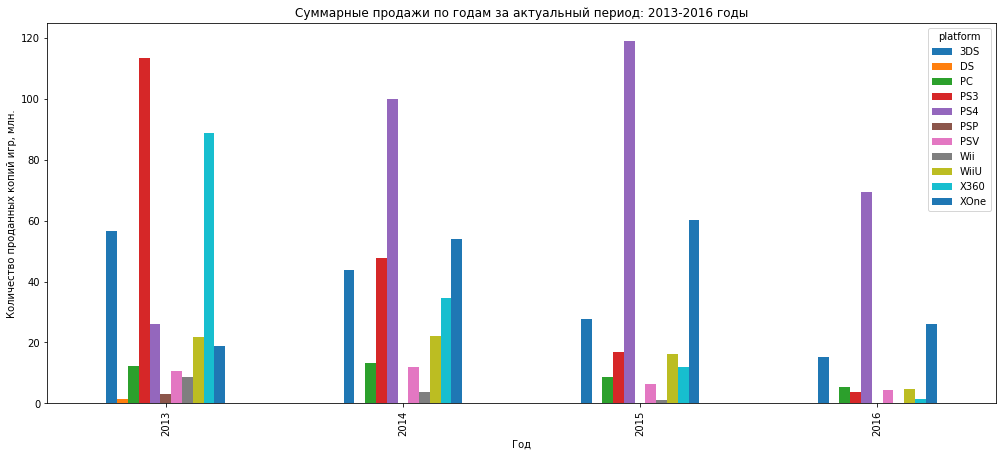

In [37]:
df_rel.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    kind='bar', figsize=(17,7))
plt.title('Суммарные продажи по годам за актуальный период: 2013-2016 годы')
plt.grid()
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

Безоговорочный лидер по продажам c 2014 года - PlayStation4, за ним следуют Xbox One и PlayStation 3. В 2015 и 2016 годах тройка лидеров выглядит следующим образом:
* PlayStation 4
* Xbox One
* Nintendo 3DS

Тем не менее, количественные показатели всех представленных платформ падают с 2015 года: число проданных копий игр на PlayStation 4 упали с 118.9 млн в 2015 году до 69.25 млн в 2016. Xbox One: с 60.14 млн до 26.15 млн. Nintendo 3DS: с 27.78 млн до 15.14 млн. 

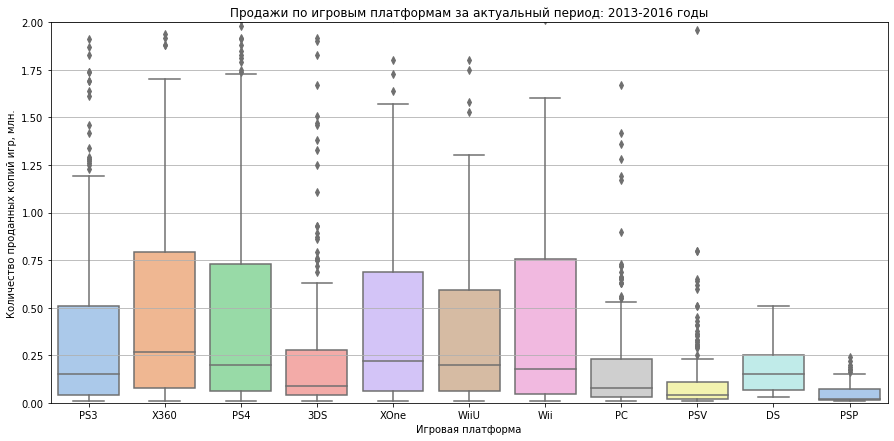

In [38]:
plt.figure(figsize=(15,7))
plt.title('Продажи по игровым платформам за актуальный период: 2013-2016 годы')
plt.grid()
plt.ylim(0, 2)
sns.boxplot(x="platform", y="total_sales", data=df_rel, palette='pastel')
plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных копий игр, млн.')
plt.show()

По "ящику с усами" можно наблюдать, что по медианным показателям лидирует Xbox 360, за ним следуют Xbox One и WiiU. Наименьший показатель наблюдается у PSP и PlayStation Vita. Если рассматривать лидеров рынка за актуальный период, то наименьшие показатели можно наблюдать у PlayStation 3 и PlayStation 4. 

У PlayStation 4 также обнаруживается наибольший квартильный размах и, соответственно, наибольший разброс данных. По показателям разброса данных далее следуют Xbox 360 и Nintendo Wii. 

## Влияние отзывов пользователей и критиков на продажи игр на платформах

На этом этапе изучим диаграмму рассеяния и коэффициенты корреляции между показателями продаж игр и отзывами пользователей и критиков. 

### PlayStation 4

In [39]:
ps4 = df_rel.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)
ps4['user_score100']=ps4['user_score']*10

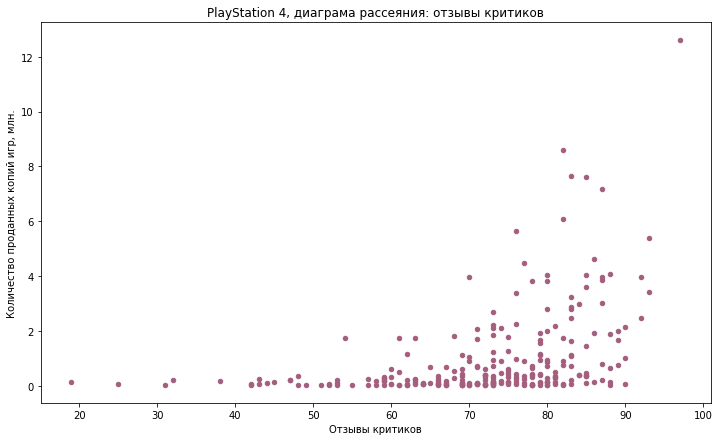

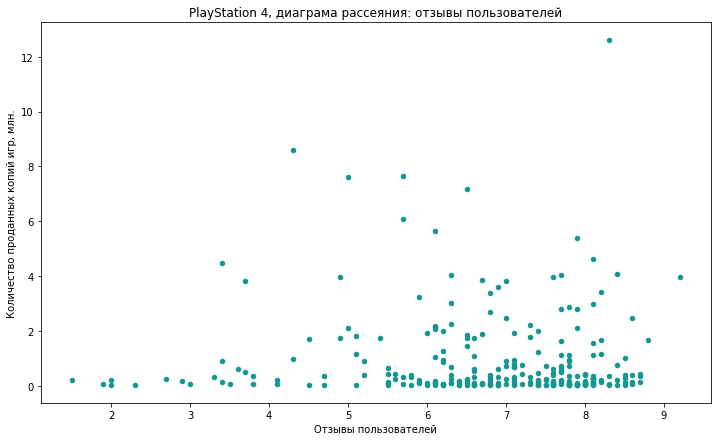

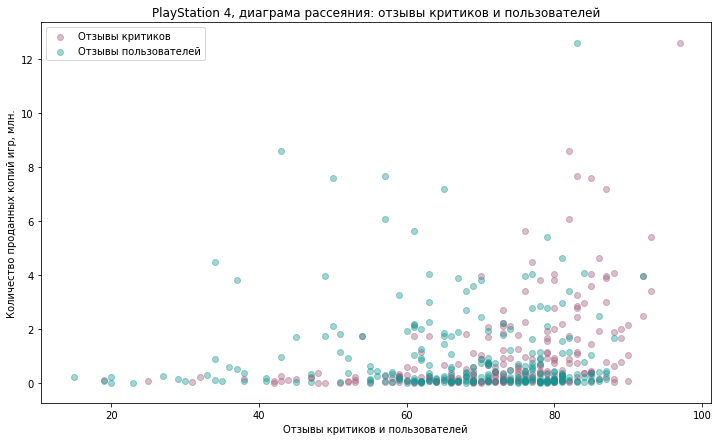

In [40]:
ps4.plot(kind='scatter', x = 'critic_score', y = 'total_sales', color='#a45e7e')
plt.xlabel('Отзывы критиков')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('PlayStation 4, диаграма рассеяния: отзывы критиков')
ps4.plot(kind='scatter', x = 'user_score', y = 'total_sales', color='#149691')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('PlayStation 4, диаграма рассеяния: отзывы пользователей')
plt.show()

plt.scatter(x = ps4['critic_score'], y = ps4['total_sales'], color='#a45e7e', alpha=0.4)
plt.scatter(x = ps4['user_score100'], y = ps4['total_sales'], color='#149691', alpha=0.4)
plt.xlabel('Отзывы критиков и пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('PlayStation 4, диаграма рассеяния: отзывы критиков и пользователей')
plt.legend(['Отзывы критиков', 'Отзывы пользователей'])
plt.show()

In [41]:
ps4.corr()

,total_sales,critic_score,user_score,user_score100
total_sales,1.000000,0.406568,-0.031957,-0.031957
critic_score,0.406568,1.000000,0.557654,0.557654
user_score,-0.031957,0.557654,1.000000,1.000000
user_score100,-0.031957,0.557654,1.000000,1.000000


Можно наблюдать **слабую положительную корреляцию между отзывами критиков (в числовом обозначении от 1 до 100) и количеством проданных копий**: чем выше значение отзывов, тем больше копий игр продано для платформы PlayStation 4. Коэффициет корреляции равен 0.4.

Взаимосвязи между отзывами пользователей и количеством проданных копий игр не обнаружено. 

### PlayStation 3

In [42]:
ps3 = df_rel.query('platform == "PS3"')[['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)
ps3['user_score100']=ps3['user_score']*10

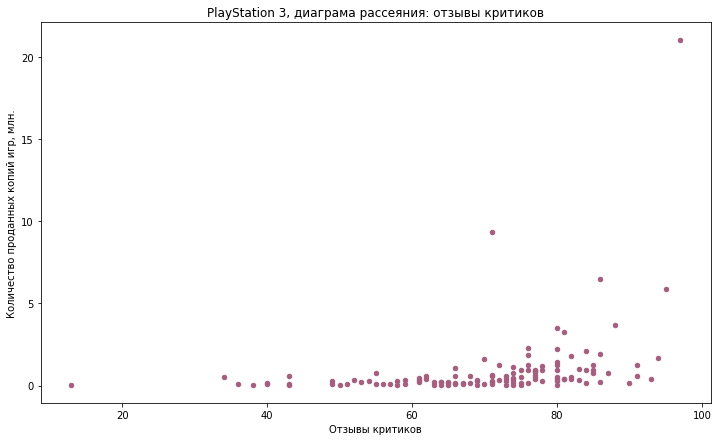

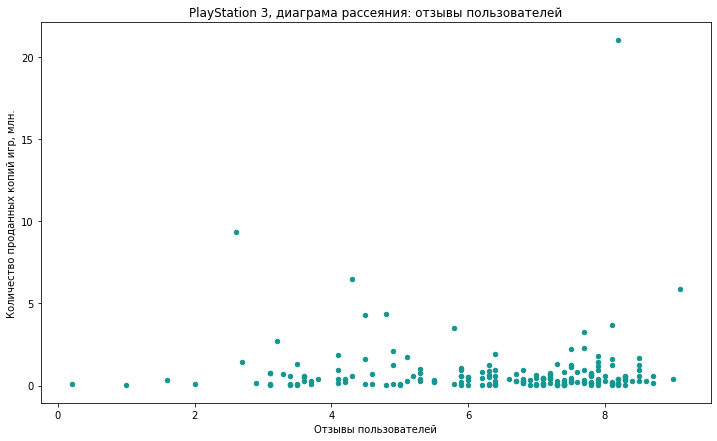

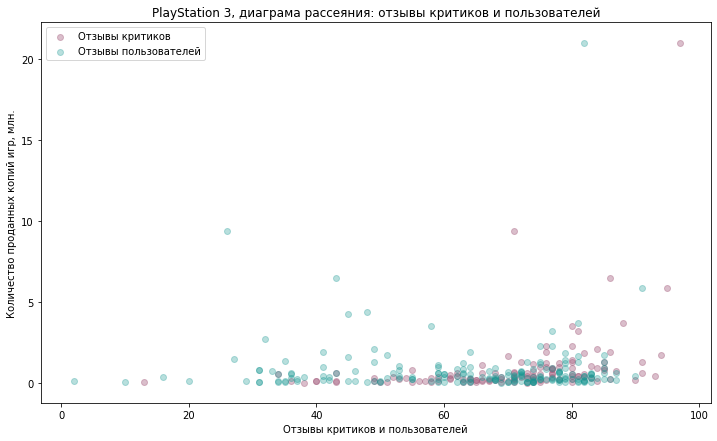

In [43]:
ps3.plot(kind='scatter', x = 'critic_score', y = 'total_sales', color='#a45e7e')
plt.xlabel('Отзывы критиков')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('PlayStation 3, диаграма рассеяния: отзывы критиков')
ps3.plot(kind='scatter', x = 'user_score', y = 'total_sales', color='#149691')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('PlayStation 3, диаграма рассеяния: отзывы пользователей')
plt.show()

plt.scatter(x = ps3['critic_score'], y = ps3['total_sales'], color='#a45e7e', alpha=0.4)
plt.scatter(x = ps3['user_score100'], y = ps3['total_sales'], color='#149691', alpha=0.3)
plt.xlabel('Отзывы критиков и пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('PlayStation 3, диаграма рассеяния: отзывы критиков и пользователей')
plt.legend(['Отзывы критиков', 'Отзывы пользователей'])
plt.show()

In [44]:
ps3.corr()

,total_sales,critic_score,user_score,user_score100
total_sales,1.000000,0.334285,0.002394,0.002394
critic_score,0.334285,1.000000,0.599920,0.599920
user_score,0.002394,0.599920,1.000000,1.000000
user_score100,0.002394,0.599920,1.000000,1.000000


Аналогичная ситуация наблюдается и для "старшего брата": заметна  **более слабая положительная корреляция между отзывами критиков и количеством проданных копий**: чем выше значение отзывов, тем больше копий игр продано для платформы PlayStation 3. Коэффициет корреляции равен 0.33.

Взаимосвязи между отзывами пользователей и количеством проданных копий игр также не обнаружено. 

### Xbox One

In [45]:
xone = df_rel.query('platform == "XOne"')[['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)
xone['user_score100']=xone['user_score']*10

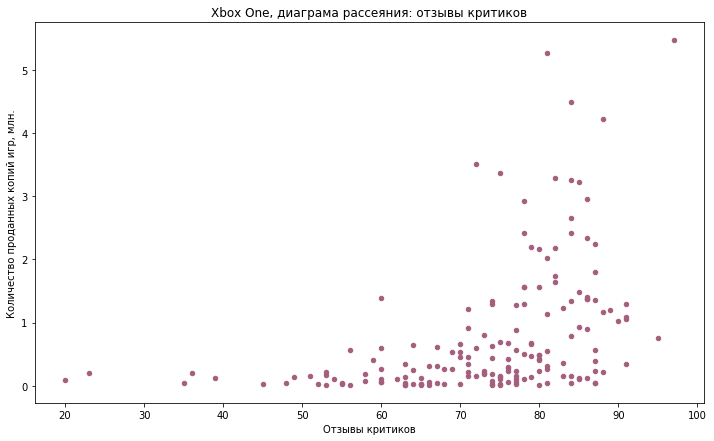

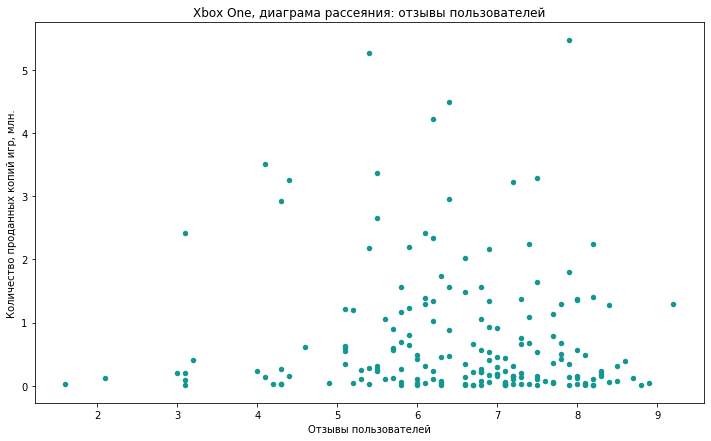

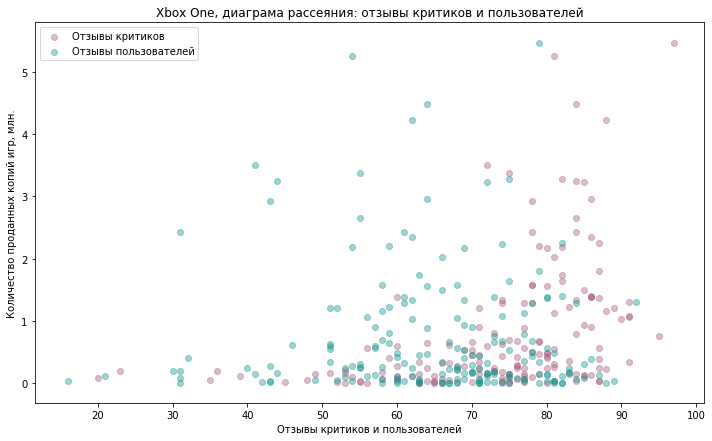

In [46]:
xone.plot(kind='scatter', x = 'critic_score', y = 'total_sales', color='#a45e7e')
plt.xlabel('Отзывы критиков')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('Xbox One, диаграма рассеяния: отзывы критиков')
xone.plot(kind='scatter', x = 'user_score', y = 'total_sales', color='#149691')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('Xbox One, диаграма рассеяния: отзывы пользователей')
plt.show()

plt.scatter(x = xone['critic_score'], y = xone['total_sales'], color='#a45e7e', alpha=0.4)
plt.scatter(x = xone['user_score100'], y = xone['total_sales'], color='#149691', alpha=0.4)
plt.xlabel('Отзывы критиков и пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('Xbox One, диаграма рассеяния: отзывы критиков и пользователей')
plt.legend(['Отзывы критиков', 'Отзывы пользователей'])
plt.show()

In [47]:
xone.corr()

,total_sales,critic_score,user_score,user_score100
total_sales,1.000000,0.416998,-0.068925,-0.068925
critic_score,0.416998,1.000000,0.472462,0.472462
user_score,-0.068925,0.472462,1.000000,1.000000
user_score100,-0.068925,0.472462,1.000000,1.000000


История повторяется и для Xbox One: заметна **слабая положительная корреляция между отзывами критиков и количеством проданных копий игр**. Коэффициент корреляции: 0.42.

Отзывы пользователей и количество проданных копий так же не взаимосвязаны. 

### Nintendo 3DS

In [48]:
n3ds = df_rel.query('platform == "3DS"')[['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)
n3ds['user_score100']=n3ds['user_score']*10

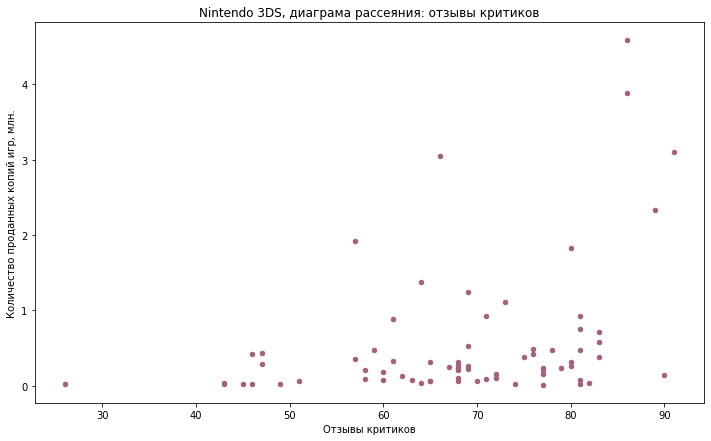

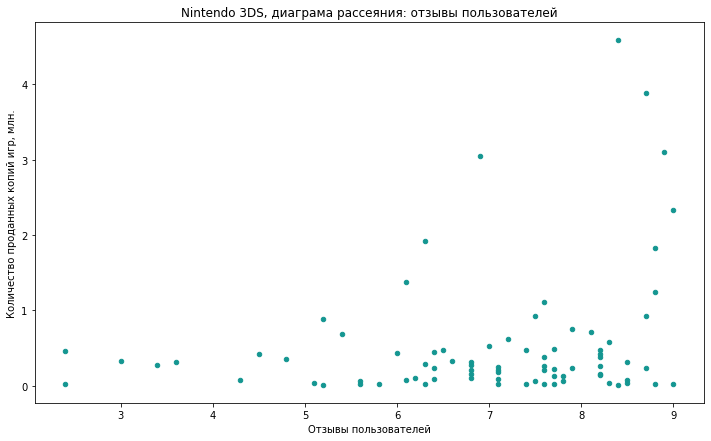

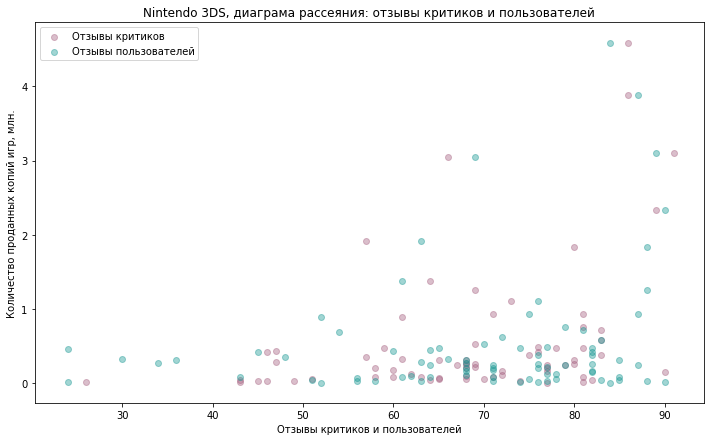

In [49]:
n3ds.plot(kind='scatter', x = 'critic_score', y = 'total_sales', color='#a45e7e')
plt.xlabel('Отзывы критиков')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('Nintendo 3DS, диаграма рассеяния: отзывы критиков')
n3ds.plot(kind='scatter', x = 'user_score', y = 'total_sales', color='#149691')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('Nintendo 3DS, диаграма рассеяния: отзывы пользователей')
plt.show()

plt.scatter(x = n3ds['critic_score'], y = n3ds['total_sales'], color='#a45e7e', alpha=0.4)
plt.scatter(x = n3ds['user_score100'], y = n3ds['total_sales'], color='#149691', alpha=0.4)
plt.xlabel('Отзывы критиков и пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('Nintendo 3DS, диаграма рассеяния: отзывы критиков и пользователей')
plt.legend(['Отзывы критиков', 'Отзывы пользователей'])
plt.show()

In [50]:
n3ds.corr()

,total_sales,critic_score,user_score,user_score100
total_sales,1.000000,0.357057,0.241504,0.241504
critic_score,0.357057,1.000000,0.769536,0.769536
user_score,0.241504,0.769536,1.000000,1.000000
user_score100,0.241504,0.769536,1.000000,1.000000


Можно наблюдать **более положительную корреляцию между отзывами критиков (в числовом обозначении от 1 до 100) и количеством проданных копий**: чем выше значение отзывов, тем больше копий игр продано для платформы Nintendo 3DS. Коэффициет корреляции равен 0.36.

**Взаимосвязь между отзывами пользователей и количеством проданных копий игр, возможно, также существует, но она очень слабая**: коэффициент корреляции равен 0.24. 

### PC

In [51]:
pc = df_rel.query('platform == "PC"')[['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)
pc['user_score100']=pc['user_score']*10

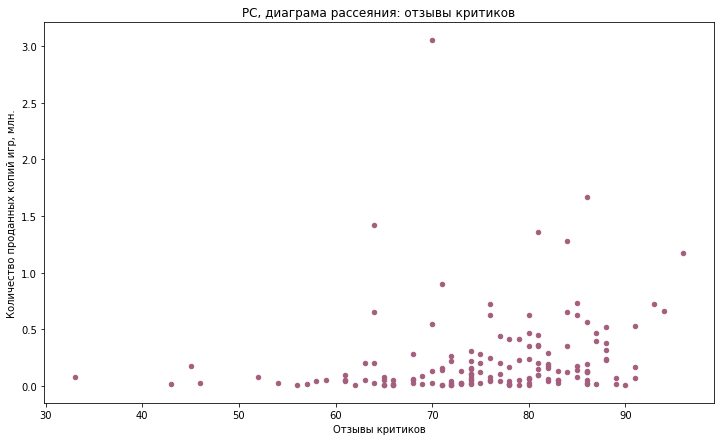

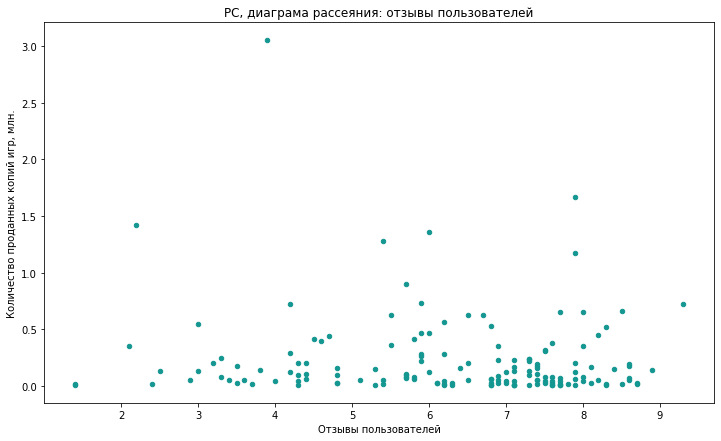

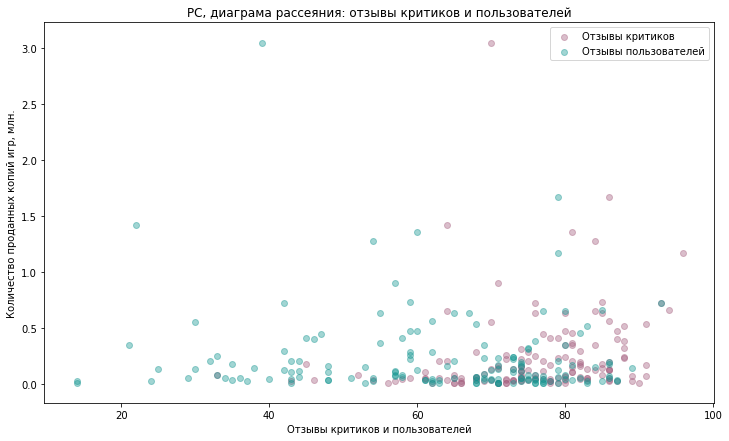

In [52]:
pc.plot(kind='scatter', x = 'critic_score', y = 'total_sales', color='#a45e7e')
plt.xlabel('Отзывы критиков')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('PC, диаграма рассеяния: отзывы критиков')
pc.plot(kind='scatter', x = 'user_score', y = 'total_sales', color='#149691')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('PC, диаграма рассеяния: отзывы пользователей')
plt.show()

plt.scatter(x = pc['critic_score'], y = pc['total_sales'], color='#a45e7e', alpha=0.4)
plt.scatter(x = pc['user_score100'], y = pc['total_sales'], color='#149691', alpha=0.4)
plt.xlabel('Отзывы критиков и пользователей')
plt.ylabel('Количество проданных копий игр, млн.')
plt.title('PC, диаграма рассеяния: отзывы критиков и пользователей')
plt.legend(['Отзывы критиков', 'Отзывы пользователей'])
plt.show()

In [53]:
pc.corr()

,total_sales,critic_score,user_score,user_score100
total_sales,1.000000,0.196030,-0.093842,-0.093842
critic_score,0.196030,1.000000,0.429562,0.429562
user_score,-0.093842,0.429562,1.000000,1.000000
user_score100,-0.093842,0.429562,1.000000,1.000000


Говоря о взаимосвязи отзывов критиков и пользователей и количество проданных копий игр для персональных компьютеров, можн оотметить, что **никакой связи не обнаружено**.

## Распределение игр по жанрам

Необходимо изучить жанры видеоигр и определить, игры каких жанров продаются лучше и хуже всего. 

In [54]:
genres = df_rel.pivot_table(index='genre', values=['total_sales', 'name'], 
                            aggfunc={'total_sales': 'sum',
                                    'name': 'count'})
genres.sort_values('total_sales', ascending=False)

,name,total_sales
genre,,
Action,766,321.87
Shooter,187,232.98
Sports,214,150.65
Role-Playing,292,145.89
Misc,155,62.82
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


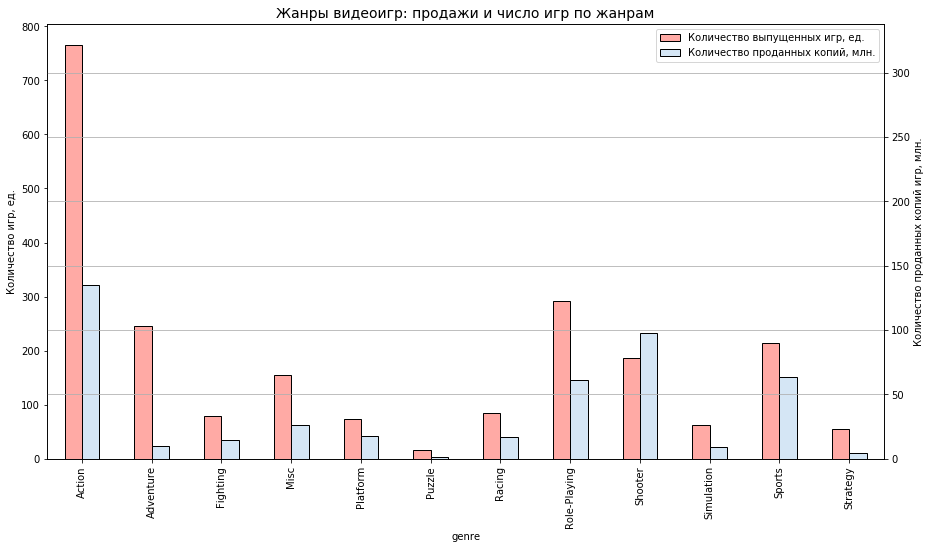

In [55]:
x = genres.plot(kind='bar', figsize=(15, 8), color=['#ffaaa5', '#d5e6f5'], ec='black')
plt.title('Жанры видеоигр: продажи и число игр по жанрам', fontsize=14)
plt.ylabel('Количество игр, ед.')
plt.xlabel('Жанры')
plt.legend(['Количество выпущенных игр, ед.', 'Количество проданных копий, млн.'])

genres[['total_sales']].plot(kind='bar', ax = x, alpha = 0.0, legend=False, secondary_y=True)
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()

In [56]:
genres['sales_per_games'] = genres['total_sales']/genres['name']
genres.sort_values('total_sales', ascending=False).round(2)

,name,total_sales,sales_per_games
genre,,,
Action,766,321.87,0.42
Shooter,187,232.98,1.25
Sports,214,150.65,0.70
Role-Playing,292,145.89,0.50
Misc,155,62.82,0.41
Platform,74,42.63,0.58
Racing,85,39.89,0.47
Fighting,80,35.31,0.44
Adventure,245,23.64,0.10


Тройка лидеров по количеству проданных копий:
* _Action_: 766 игр, продано 321.87 млн копий
* _Shooter_: 187 игр, продано 232.98 млн копий
* _Sports_: 214 игр, 150.65 млн копий

И наименее популярные жанры:
* _Puzzle_: 17 игр, 3.17 млн копий
* _Strategy_: 56 игр, 10.09 млн копий
* _Simulation_: 62 игры, 21.76 млн копий

Тем не менее, стоит отметить, что в случае игры жанра _Action_ лидирующая позиция получена за счет количества выпущенных игры, при том, что среднее количество продаж на одну игру в этом жанре не очень большое - 420 тыс копий. Что же касается жанра _Shooter_, на одну игру приходится с среднем 1.25 млн копий; здесь полулярность достигается именно за счет продаваемости. 

In [57]:
df_rel.pivot_table(
    index=['name', 'genre'], values='total_sales', aggfunc='sum').sort_values(
    'total_sales', ascending=False).head(10)

,,total_sales
name,genre,
Grand Theft Auto V,Action,56.58
Call of Duty: Ghosts,Shooter,27.39
Call of Duty: Black Ops 3,Shooter,25.67
Minecraft,Misc,24.16
Call of Duty: Advanced Warfare,Shooter,21.97
FIFA 15,Sports,17.37
FIFA 14,Sports,16.46
FIFA 16,Sports,16.30
Pokemon X/Pokemon Y,Role-Playing,14.60


Можно заметить, что третье по популярности место жанра _Sports_ получено за счет игр FIFA: более трети всех проданных копий приходится на эти игры. Среди игр жанра _Shooter_ выделяются Call of Duty (более 70 млн копий за 3 игры серии). В топ-10 самых популярных игр лидирует GTA V - игра жанра _Action_ - с рекордными 56.58 млн проданных копий, что составляет 17.6% всех продаж жанра). 

### Промежуточные выводы

На первом этапе исследовательского анализа данных было выявлено, что "жизненный цикл" игровой платформы составляет около 10 лет, при этом платформа достигает пика за 3-5 лет, затем вытесняется более совершенными игровыми платформами. Было решено взять для анализа данные начиная с 2013 года (из 2017 года мы вычли 4 года, требующиеся платформе, чтобы достигнуть пика продаж игр). Так был обозначен актуальный период, и все последующие операции с данными производились именно для этого периода. 

Лидер по продажам c 2014 года - PlayStation4, за ним следуют Xbox One и PlayStation 3. Однако, начиная с 2015 года количество проданных копий игр падает по всем платформам. 

Согласно графику "ящик с усами", что по медианным показателям лидирует Xbox 360, за ним следуют Xbox One и WiiU. 

Для большинства игровых платформа наблюдается слабая положительная корреляция (0.3-0.4) между отзывами критиков и количеством продажжых копий. Для отзывов пользователей и количества проданных копий такая связь не характерна. 

Самые популярные жанры видеоигр - _Action_, _Shooter_ и _Sports_: 321.85, 232.98 и 150.65 млн проданных копий соответственно. Внутри этих жанров выделяются GTA V (_Action_), серия Call of Duty (_Shooter_) и серия FIFA (_Sports_).

## Портрет пользователей по регионам

На данном этапе мы рассмотрим, какие платформы и игровые жанры наиболее популярны в Северной Америке, Европе и Японии. Также мы изучим, влияет ли рейтинг ESRB на продажи по регионам. 

_Пояснение по рейтингу ESRB (Entertainment Software Rating Board):_

* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

### Северная Америка

#### Игровые платформы

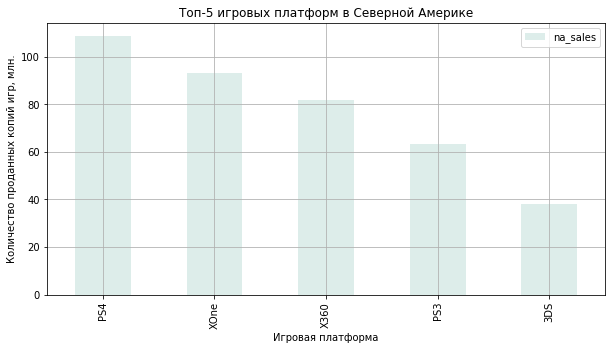

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [58]:
df_rel.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(
    'na_sales', ascending=False).head(5).plot(kind='bar', figsize=(10, 5), 
    color='#ddedea', title='Топ-5 игровых платформ в Северной Америке')

plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

df_rel.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(
    'na_sales', ascending=False).head(5)

В Северной Америке наибольшую популярность имеет PlayStation 4 c 108.74 млн проданных копий игр. За ним следуют два поколения Xbox - One и 360 - 93.12 и 81.66 млн копий соответственно. Далее с 63.50 млн проданных копий располагается PlayStation 3, а за ней Nintendo 3DS.

#### Игровые жанры

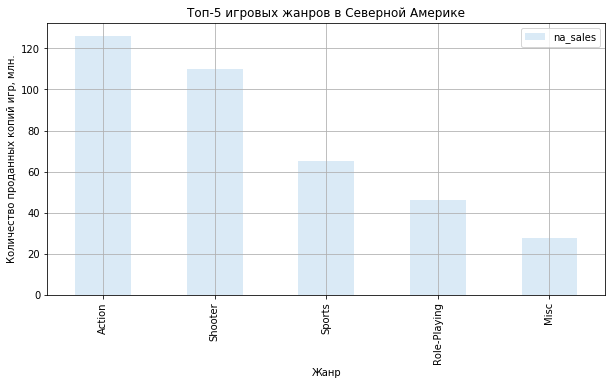

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [59]:
df_rel.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(
    'na_sales', ascending=False).head(5).plot(kind='bar', figsize=(10, 5), 
    color='#daeaf6', title='Топ-5 игровых жанров в Северной Америке')

plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

df_rel.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(
    'na_sales', ascending=False).head(5)

Топ-5 жанров видеоигр в Северной Америке выглядит так же, как и топ-5 по миру: лидируют игры жанра _Action_ и замыкает пятерку лидеров жанр _Misc_. 

#### Рейтинг ESRB

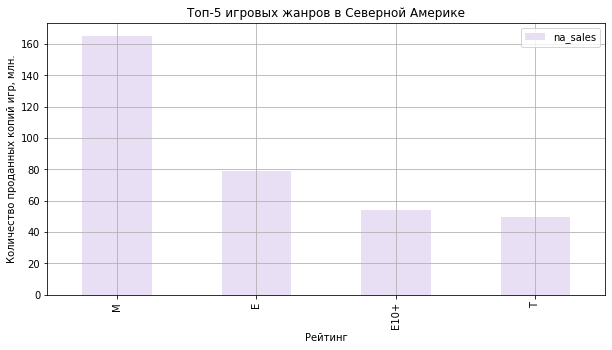

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [60]:
df_rel.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(
    'na_sales', ascending=False).plot(kind='bar', figsize=(10, 5), 
    color='#e8dff5', title='Топ-5 игровых жанров в Северной Америке')

plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

df_rel.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(
    'na_sales', ascending=False)

С большим отрывом лидируют игры рейтинга "M" - это игры категории 18+. Вероятно, многие игры жанров _Action_ и _Shooting_ относится именно к этому рейтингу. Меньше всего продано копий игры жанра "T" - игры для подростков от 13 лет.

### Европа

#### Игровые платформы

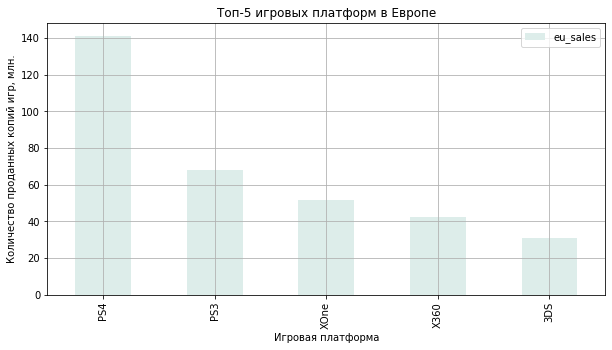

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [61]:
df_rel.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(
    'eu_sales', ascending=False).head(5).plot(kind='bar', figsize=(10, 5), 
    color='#ddedea', title='Топ-5 игровых платформ в Европе')

plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

df_rel.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(
    'eu_sales', ascending=False).head(5)

В Европе, так же, как и Северной Америке, на первом месте по количеству проданных копий (141 млн) PlayStation 4, а замыкает топ-5, как и в Северной Америке, Nintendo 3DS (30.96 млн). 
В остальном ситуация в Европе отлична: на втором месте PlayStation 3 (67.81 млн копий), на третьем - Xbox One (51.59 млн копий), а на четвертом Xbox One (42.52 млн копий).

#### Игровые жанры

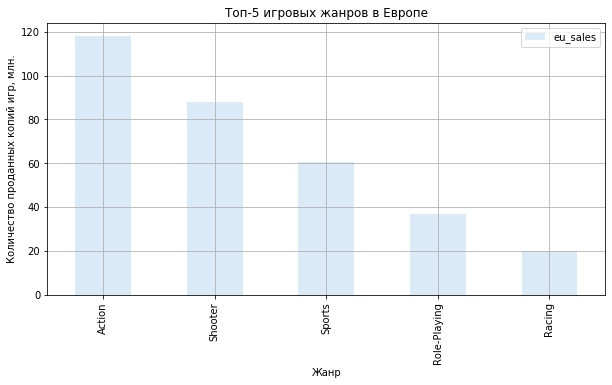

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [62]:
df_rel.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(
    'eu_sales', ascending=False).head(5).plot(kind='bar', figsize=(10, 5), 
    color='#daeaf6', title='Топ-5 игровых жанров в Европе')

plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

df_rel.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(
    'eu_sales', ascending=False).head(5)

Топ-5 игровых жанров в Европе отличается от Северной Америки и мира только тем, что на пятое место вышел жанр _Racing_. В остальном дела обстоят так же: лидируют _action_-игры, _шутеры, спортивные_ и _RPG_.

#### Рейтинг ESRB

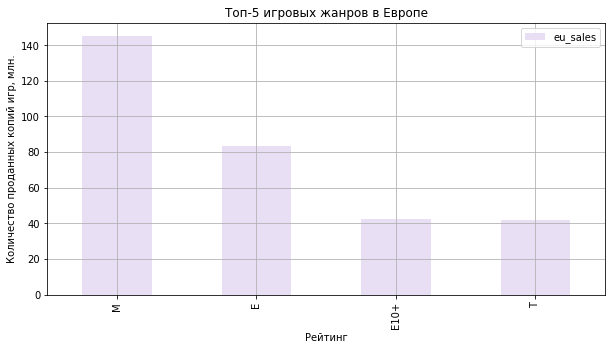

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [63]:
df_rel.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(
    'eu_sales', ascending=False).plot(kind='bar', figsize=(10, 5), 
    color='#e8dff5', title='Топ-5 игровых жанров в Европе')

plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

df_rel.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(
    'eu_sales', ascending=False)

Наиболее популярны игры рейтинга "М", т.е. игры для аудитории 18+, а наименее популярны игры рейтинга "T" (для подростков 13+) - в Европе ситуация такая же, как и в Северной Америке. 

### Япония

#### Игровые платформы

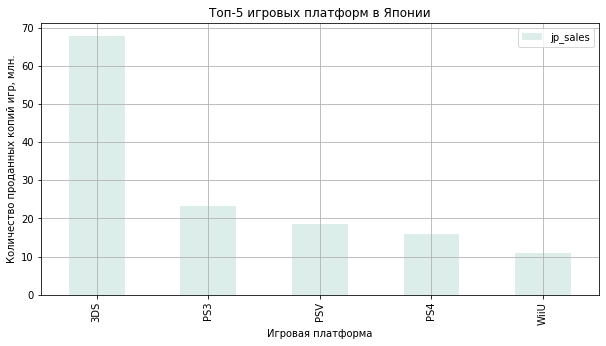

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


In [64]:
df_rel.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(
    'jp_sales', ascending=False).head(5).plot(kind='bar', figsize=(10, 5), 
    color='#ddedea', title='Топ-5 игровых платформ в Японии')

plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

df_rel.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(
    'jp_sales', ascending=False).head(5)

Японский рынок меньше рынка Европы и Северной Америке, и он явно отличается от западных.
Лидер японского рынка - Nintendo 3DS, для этой платформы, производимой в Японии, продано более 67 млн копий игр. Второе место занимает PlayStation3 с 23.35 млн проданных копий игр - это почти в 3 раза меньше, чем у Nintendo. Далее следуют две другие платформы от PlayStation, и замыкает топ-5 Nintendo WiiU с 10.88 млн копий игр, проданных за актуальный период.

#### Игровые жанры

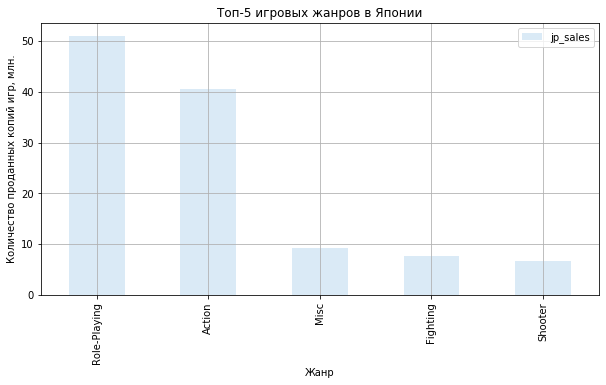

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [65]:
df_rel.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(
    'jp_sales', ascending=False).head(5).plot(kind='bar', figsize=(10, 5), 
    color='#daeaf6', title='Топ-5 игровых жанров в Японии')

plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

df_rel.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(
    'jp_sales', ascending=False).head(5)

Японские геймеры предпочитают не только другие игровые платформы, но и игры других жанров. На первом месте _RPG_ с 51 млн проданных копий игр этого жанра. Наиболее популярные в Европе и Северной Америке игры жанра _Action_ японской аудитории чуть менее интересны и занимают 2 место с 40.49 млн проданных копий. Третье и последующие места имеют гораздо меньшую аудиторию - было продано менее 10 млн копий игры жанров _Misc_, _Fighting_ и _Shooter_.

#### Рейтинг ESRB

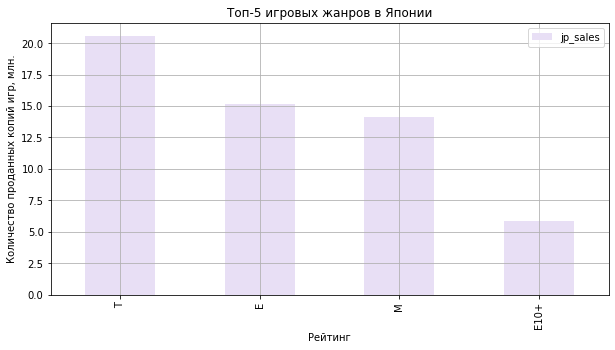

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


In [66]:
df_rel.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(
    'jp_sales', ascending=False).plot(kind='bar', figsize=(10, 5), 
    color='#e8dff5', title='Топ-5 игровых жанров в Японии')

plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий игр, млн.')
plt.grid()
plt.show()

df_rel.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(
    'jp_sales', ascending=False)

Японские игроки снова отличаются от аудитории Северной Америки и Европы: если на западе наиболее популярны игры рейтинга "M" (18+) и наименее популярные игры для подростков (рейтинг "Т"), но в Японии ситуация практически противоположная. Японские геймеры предпочитают игры рейтинга "Т" (20.59 млн проданных копий), а игры рейтинга "М" только на третьем месте с 14.11 млн проданных копий.

### Промежуточные выводы

Портрет пользователя в Северной Америке и Европе очень похожи и влияют на статистику по миру: наиболее популярной платформой является PlayStation 4, самые популярные жанры игр - _Action_ и _Shooter_, геймеры предпочитают игры с рейтингом "М" (18+).

Портрет же японского пользователя отличается во всем: наиболее популярная игровая платформа - Nintendo 3DS, самый популярный жанр игр - _RPG_, лучше всего продаются игры с рейтингом "Т" (13+). 

## Проверка гипотез

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Примем нулевую гипотезу H0 о том, что средние рейтинги пользователей для платформ Xbox One и PC равны. 
Альтернативная гипотеза H1, в таком случае, состоит в том, что средние рейтинги пользователей для платформ Xbox One и PC не равны.

In [67]:
df_rel.query('platform == "XOne" or platform == "PC"').groupby('platform').agg(
    {'user_score': ['count', 'mean', 'median', np.std, np.var]}).round(2)

user_score                         
              count  mean median   std   var
platform                                    
PC              155  6.27    6.8  1.74  3.04
XOne            182  6.52    6.8  1.38  1.91

Медианное значение пользовательских рейтингов для Xbox One и PC равны 6.8. Среднее значение для PC (6.27) при этом ниже, чем для Xbox One (6.52), а стандартное отклонение выше. 

In [68]:
df_rel_xone = df_rel[df_rel['platform'] == 'XOne']['user_score'].dropna().reset_index(drop=True)
df_rel_pc = df_rel[df_rel['platform'] == 'PC']['user_score'].dropna().reset_index(drop=True)

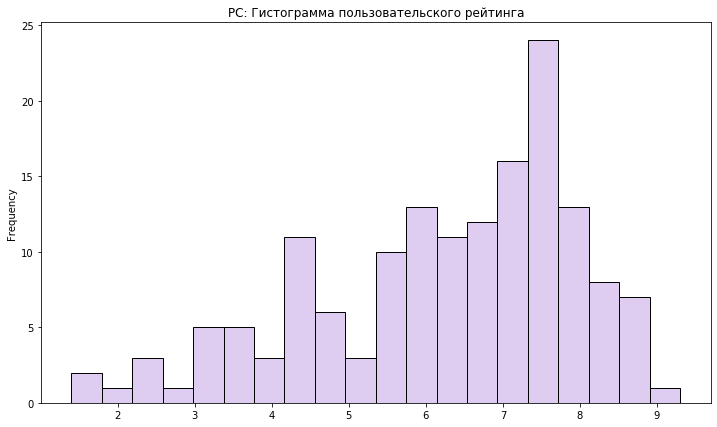

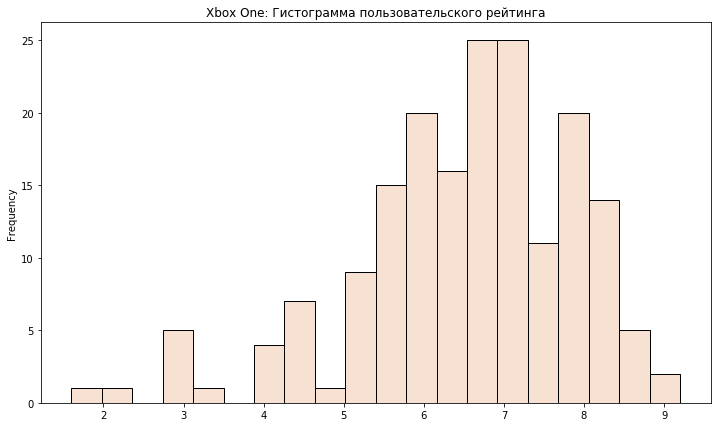

In [69]:
df_rel_pc.plot(kind='hist', bins=20, 
                 title='PC: Гистограмма пользовательского рейтинга', color='#dfccf1', ec='black')
plt.show()

df_rel_xone.plot(kind='hist', bins=20, 
                 title='Xbox One: Гистограмма пользовательского рейтинга', color='#f7e1d3', ec='black')
plt.show()

Данные стремятся к "куполу", при этом это независимые данные генеральных совокупностей. Для проверки гипотезы мы можем использовать t-тест Стьюдента.

Критерий значимости установим как 0.05 (5%). Так при проверке статистических гипотез вероятность ошибки будет равна 5% (в одном случае из 20 может быть совершена ошибка).

In [70]:
alpha = 0.05

results = st.ttest_ind(df_rel_xone, df_rel_pc)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


В данном случае нулевую гипотезу отвергнуть не удалось, а значит, мы можем предполагать, что средние рейтинги пользователей для платформ Xbox One и PC равны.

### Гипотеза 2: Средние пользовательские рейтинги жанров _Action_ и _Sports_ разные.

Примем нулевую гипотезу H0 о том, что средние рейтинги пользователей для жанров _Action_ и _Sports_ равны. 
Альтернативная гипотеза H1, состоит в том, что средние рейтинги пользователей для жанров _Action_ и _Sports_ не равны.

In [71]:
df_rel.query('genre == "Action" or genre == "Sports"').groupby('genre').agg(
    {'user_score': ['count', 'mean', 'median', np.std, np.var]}).round(2)

user_score                         
            count  mean median   std   var
genre                                     
Action        389  6.84    7.1  1.33  1.77
Sports        160  5.24    5.5  1.78  3.18

Для пользовательских рейтингов жанра _Action_ среднее (6.84) приближено к медиане (7.1), стандартное отклонение составляет 1.33.

Среднее значение пользовательских рейтингов по жанру _Sports_ (5.24) также близко к медианному (5.5), стандартное отклонение составляет 1.78.

In [72]:
df_rel_action = df_rel[df_rel['genre']=='Action']['user_score'].dropna().reset_index(drop=True)
df_rel_sports = df_rel[df_rel['genre']=='Sports']['user_score'].dropna().reset_index(drop=True)

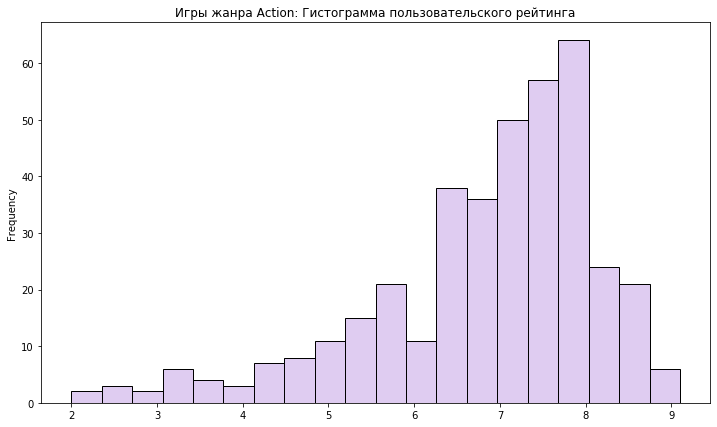

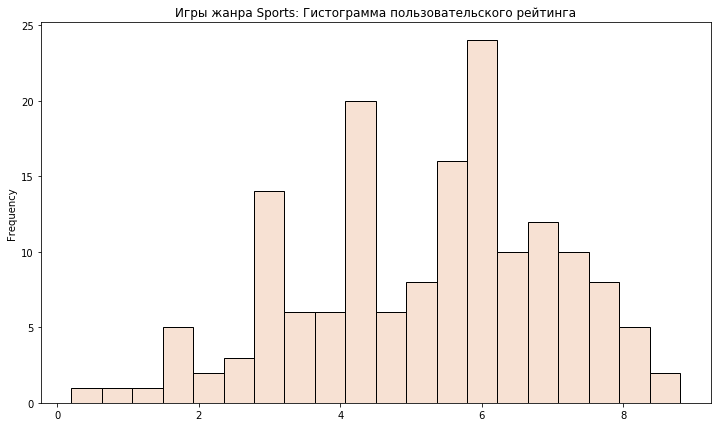

In [73]:
df_rel_action.plot(kind='hist', bins=20, 
                 title='Игры жанра Action: Гистограмма пользовательского рейтинга', color='#dfccf1', ec='black')
plt.show()

df_rel_sports.plot(kind='hist', bins=20, 
                 title='Игры жанра Sports: Гистограмма пользовательского рейтинга', color='#f7e1d3', ec='black')
plt.show()

Проверку гипотезы в данном случае так же можно производить при помощи t-теста с критерием значимости _p-value_ 0.05. 

In [74]:
alpha = 0.05

results = st.ttest_ind(df_rel_action, df_rel_sports)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Мы можем отвергнуть нулевую гипотезу о том, что средние рейтинги пользователей для жанров Action и Sports равны и предположить, что средние рейтинги разные.

### Промежуточные выводы

* Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не удалось отвергнуть нулевую гипотезу о том, что средние рейтинги пользователей для жанров Action и Sports равны. 
* Гипотера 2: Средние пользовательские рейтинги жанров Action и Sports разные - не удалось отвергнуть нулевую гипотезу о том, что средние рейтинги пользователей для жанров Action и Sports равны; можно предположить, что средние рейтинги разные. 

# Общие выводы

In [75]:
print(
'Исходная база данных составляла', entries_before, 'строк.'
)
print(
'После проведения предобработки данных база данных сократилась до', entries_after, 'строк.'
)
print(
'Так база данных, с которой была продолжена работа, составила {:.01%} от исходной.'.format(
entries_after/entries_before)
)
print(
'Анализ продаж игр проводился для актуального периода, а именно периода с 2013 года.')
print('Такая база данных составила', len(df_rel), 'строк.')
print(
'Эта база данных составила {:.01%} от базы данных, которая была получена после предобработки.'.format(
len(df_rel)/entries_after)
)

Исходная база данных составляла 16715 строк.
После проведения предобработки данных база данных сократилась до 16444 строк.
Так база данных, с которой была продолжена работа, составила 98.4% от исходной.
Анализ продаж игр проводился для актуального периода, а именно периода с 2013 года.
Такая база данных составила 2233 строк.
Эта база данных составила 13.6% от базы данных, которая была получена после предобработки.


Ознакомившись с данными, мы привели названия колонок к нижнему регистру, провели поиск дубликатов, поработали с пропущенными значениями и привели данные к нужным типам. Был добавлен столбец `sales_total` с суммарными продажами по всем регионам.

На этпе исследовательского анализа данных было обнаружено, что начиная с 1994 года в год выпускалось 100+ игр, в 2008 было достигнуто пиковое значение - 1427 игр в год. Далее количество выпускаемых игр в год уменьшается.
За весь изучаемый период, с 1980 по 2016 годы, лидерами продаж стали платформы PlayStation 2, Xbox 360 и PlayStation 3. Тем не менее, за 2015-2016 годы по количеству проданных копий игр лидируют более современные платформы: PlayStation 4, PlayStation Vita и Xbox One. 
"Жизненный цикл" игровой платформы составляет прибилизительно 10 лет: за это время платформа достигает пика проданных копий игры (обычно за 3-5 лет после входа на рынок), а потом постепенно вытесняются новыми платформами. Именно поэтому за актуальный период, на основании которого разрабатывать прогнозы на будущие продажи, был выбран период с 2013 года. Мы вычли из 2017 года 4 года, то есть период восхождения игровой платформы на пик продаж.

За актуальный период лидеров продаж является PlayStation 4, за ним следуют Xbox One и PlayStation 3. Тем не менее, количественные показатели всех представленных платформ падают с 2015 года: число проданных копий игр на PlayStation 4 упали с 118.9 млн в 2015 году до 69.25 млн в 2016. Xbox One: с 60.14 млн до 26.15 млн. Nintendo 3DS: с 27.78 млн до 15.14 млн.
Был сделан вывод, что для многих платформ отзывы критиков имеют слабую положительную корреляцию с количеством проданных копий игр. Пользовательские отзывы и на количество проданных копий, согласно проведенному анализу, не влияют. 
Наиболее популярные жанры, лидирующие по продажам за актуальный период:
* _Action_: 766 игр, продано 321.87 млн копий
* _Shooter_: 187 игр, продано 232.98 млн копий
* _Sports_: 214 игр, 150.65 млн копий

При этом, можно заметить игры-гиганты внутри этих жанров, которые оказывают значительное влияние на продажи жанра в целом. Так третье по популярности место жанра _Sports_ получено за счет игр FIFA: более трети всех проданных копий приходится на эти игры. Среди игр жанра _Shooter_ выделяются Call of Duty (более 70 млн копий за 3 игры серии). А самом популярной игрой за актуальный период является GTA V - игра жанра _Аction_ - с рекордными 56.58 млн проданных копий, что составляет 17.6% всех продаж жанра). 
Наименее популярнями жанрами являются _Puzzle_, _Strategy_ и _Simulation_. 

Если рассматривать портрет пользователей по регионам, что можно заметить, что пользователи Северной Америки и Европы во многом схожи, и это влияет на картину среднего пользователя по миру: наиболее популярной платформой является PlayStation 4, самые популярные жанры игр - Action и Shooter, геймеры предпочитают игры с рейтингом "М" (18+).
Портрет же японского пользователя отличается во всем: наиболее популярная игровая платформа - Nintendo 3DS, самый популярный жанр игр - RPG, лучше всего продаются игры для подростков с рейтингом "Т" (13+).

Были проверены 2 гипотезы при помощи t-теста:
* Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не удалось отвергнуть нулевую гипотезу о том, что средние рейтинги пользователей для жанров Action и Sports равны. 
* Гипотера 2: Средние пользовательские рейтинги жанров Action и Sports разные - не удалось отвергнуть нулевую гипотезу о том, что средние рейтинги пользователей для жанров Action и Sports равны; можно предположить, что средние рейтинги разные. 
